/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


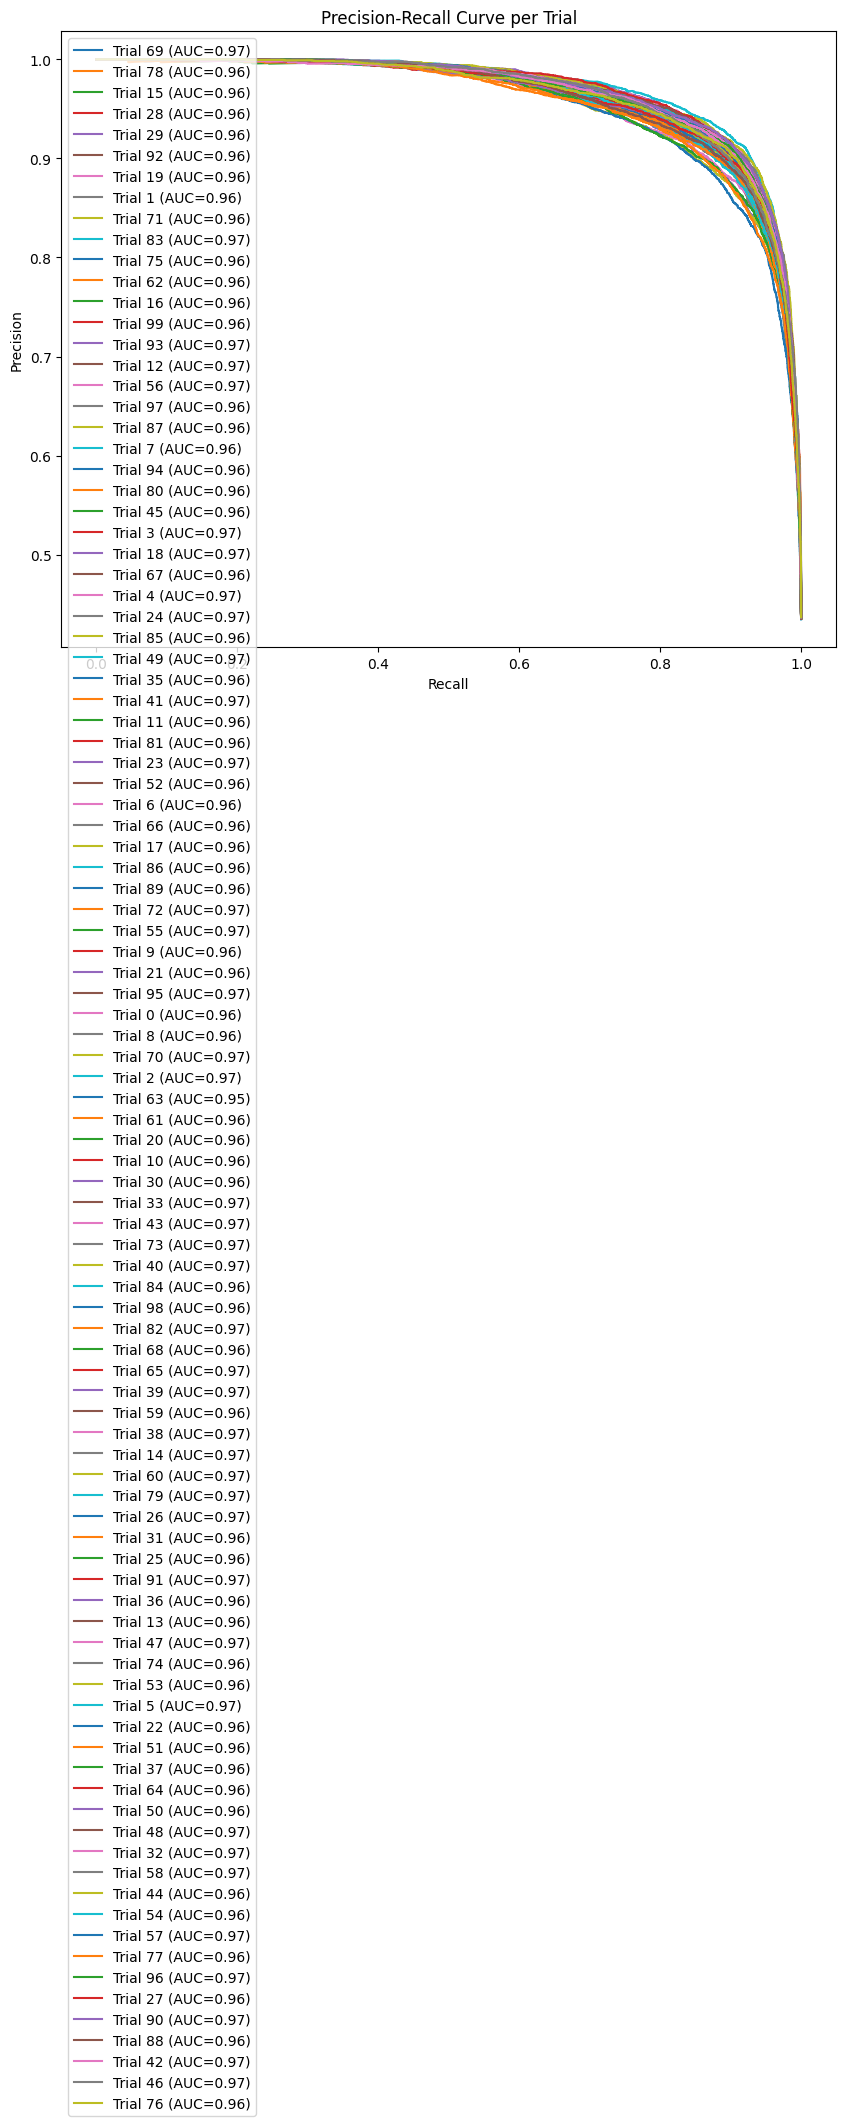

In [6]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize a figure for the plots
plt.figure(figsize=(10, 8))

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            # Extract the precision and recall arrays
            precision = data['SCORE']['snp']['precision_n']
            recall = data['SCORE']['snp']['recall_n']
            
            # Compute the area under the curve (AUC) for display
            pr_auc = auc(recall, precision)
            
            # Extract the trial number from the filename for labeling
            trial_number = int(filename.split('_')[-1].split('.')[0])
            
            # Plot the precision-recall curve
            plt.plot(recall, precision, label=f'Trial {trial_number} (AUC={pr_auc:.2f})')

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Trial')
plt.legend()  # Add a legend to label each trial's curve
plt.show()


In [4]:
import os
import pickle

# Path to one of your .pkl files
file_path = 'pkls/test.score.metrics_trial_0.pkl'
x
# Load the data
with open(file_path, 'rb') as file:
    data = pickle.load(file)
    # If we're exploring the 'snp' key under 'SCORE'
    print("Keys under 'SCORE' -> 'snp':", data['SCORE']['snp'].keys())

    # Optionally, if you want to check both 'snp' and 'indel'
    print("Keys under 'SCORE' -> 'indel':", data['SCORE']['indel'].keys())

Keys under 'SCORE' -> 'snp': dict_keys(['num_training', 'num_selected', 'num_training_and_selected', 'num_cn', 'num_cp', 'initial_median_mendelian_error_rate', 'initial_median_het_rate', 'score_n', 'unsorted_score_n', 'mendelian_status_code_nt', 'is_cn_n', 'is_cp_n', 'precision_n', 'recall_n', 'fpr_n', 'PR_AUC', 'ROC_AUC'])
Keys under 'SCORE' -> 'indel': dict_keys(['num_training', 'num_selected', 'num_training_and_selected', 'num_cn', 'num_cp', 'initial_median_mendelian_error_rate', 'initial_median_het_rate', 'score_n', 'unsorted_score_n', 'mendelian_status_code_nt', 'is_cn_n', 'is_cp_n', 'precision_n', 'recall_n', 'fpr_n', 'PR_AUC', 'ROC_AUC'])


In [29]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize lists to store data
trial_numbers = []
pr_auc_scores = []

# Collect precision and recall for all trials to identify the best one
all_trials_data = {}

# Loop through each file to collect precision and recall for all trials
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            precision = data['SCORE']['snp']['precision_n']
            recall = data['SCORE']['snp']['recall_n']

            # Compute AUC to determine the best trial
            pr_auc = auc(recall, precision)
            
            trial_number = int(filename.split('_')[-1].split('.')[0])
            trial_numbers.append(trial_number)
            pr_auc_scores.append(pr_auc)
            
            # Store the precision and recall data for this trial
            all_trials_data[trial_number] = (precision, recall)

# Find the first trial (smallest trial number)
first_trial_number = min(trial_numbers)
first_trial_data = all_trials_data[first_trial_number]

# Find the best trial (highest AUC score)
best_trial_index = pr_auc_scores.index(max(pr_auc_scores))
best_trial_number = trial_numbers[best_trial_index]
best_trial_data = all_trials_data[best_trial_number]

# Create the plot with all trials in grey, first trial in light red, and best trial in dark red
plt.figure(figsize=(10, 8))

# Plot all trials in grey
for trial_number, (precision, recall) in all_trials_data.items():
    color = 'grey' if trial_number not in [first_trial_number, best_trial_number] else None
    if color:
        plt.plot(recall, precision, color=color)

# Highlight the first and best trials
plt.plot(best_trial_data[1], best_trial_data[0], color='darkred', label=f'Best Trial {best_trial_number}')
plt.plot(first_trial_data[1], first_trial_data[0], color='lightcoral', label=f'First Trial {first_trial_number}')

# Set plot limits
plt.xlim([0.7, 1])
plt.ylim([0.8, 1])

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Trial')
plt.legend(loc='lower left')
plt.show()


ValueError: invalid literal for int() with base 10: 'test'

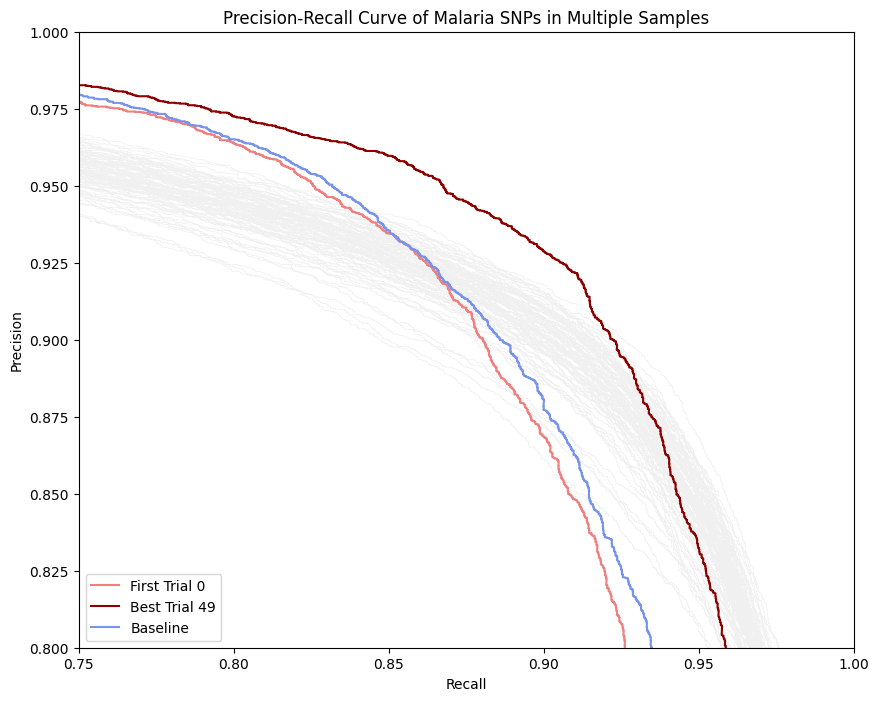

In [32]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize data structures
all_trials_data = {}
baseline_data = test_data = None
first_trial_data = best_trial_data = None

# Loop through each file to collect precision and recall data
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            
            if 'baseline' in filename:
                baseline_precision = data['SCORE']['snp']['precision_n']
                baseline_recall = data['SCORE']['snp']['recall_n']
                baseline_data = (baseline_recall, baseline_precision)
            else:
                precision = data['SCORE']['snp']['precision_n']
                recall = data['SCORE']['snp']['recall_n']
                trial_number = int(filename.split('_')[-1].split('.')[0])
                all_trials_data[trial_number] = (recall, precision, auc(recall, precision))

# Ensure there is trial data to plot
if all_trials_data:
    first_trial_number = min(all_trials_data.keys())
    best_trial_number = max(all_trials_data, key=lambda k: all_trials_data[k][2])
    first_trial_data = all_trials_data[first_trial_number]
    best_trial_data = all_trials_data[best_trial_number]

    # Create the plot
    plt.figure(figsize=(10, 8))
    light_grey = '#f0f0f0'  # Very light grey for other trials

    # Plot all non-highlighted trials in light grey
    for trial_number, (recall, precision, _) in all_trials_data.items():
        if trial_number not in [first_trial_number, best_trial_number]:
            plt.plot(recall, precision, color=light_grey, linewidth=0.5)

    # Highlight the key trials and special cases
    if first_trial_data:
        plt.plot(first_trial_data[1], first_trial_data[0], color='lightcoral', label=f'First Trial {first_trial_number}')
    if best_trial_data:
        plt.plot(best_trial_data[1], best_trial_data[0], color='darkred', label=f'Best Trial {best_trial_number}')
    if baseline_data:
        plt.plot(baseline_data[1], baseline_data[0], color='#7894EA', label='Baseline')
    if test_data:
        plt.plot(test_data[1], test_data[0], color='#34D1BF', label='Test')

    # Set plot limits, labels, and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve of Malaria SNPs in Multiple Samples')
    plt.legend(loc='lower left')
    plt.xlim([0.75, 1])
    plt.ylim([0.8, 1])
    plt.show()
else:
    print("No trial data found. Please check the directory path and file naming.")


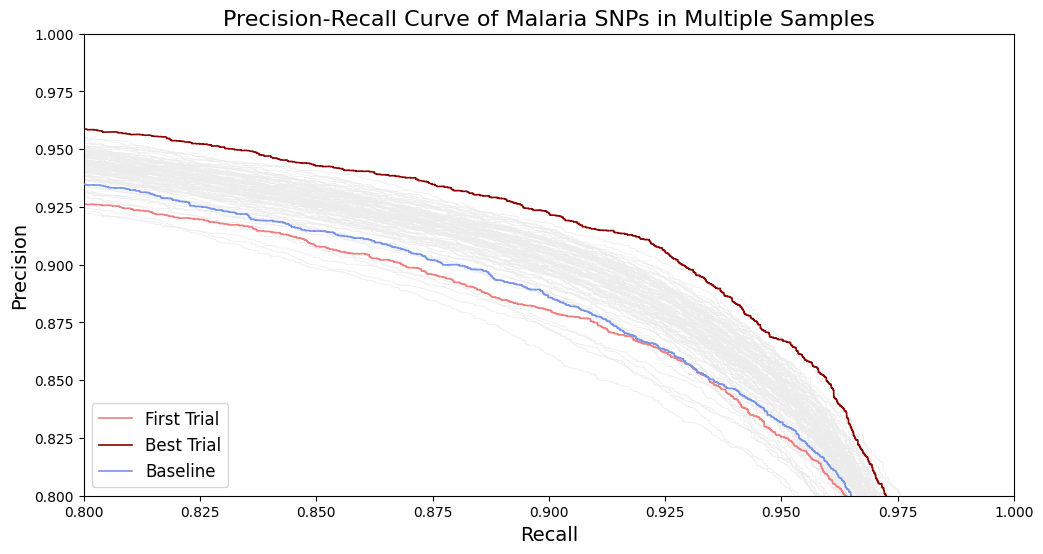

In [56]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize lists to store data
trial_numbers = []
pr_auc_scores = []

# Collect precision and recall for all trials and the baseline
all_trials_data = {}
baseline_data = None
line_width = 1.2
# Loop through each file to collect precision and recall for all trials
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            
            if 'baseline' in filename:
                # Special handling for baseline data
                baseline_precision = data['SCORE']['snp']['precision_n']
                baseline_recall = data['SCORE']['snp']['recall_n']
                baseline_pr_auc = auc(baseline_recall, baseline_precision)
                baseline_data = (baseline_precision, baseline_recall, baseline_pr_auc)
            elif 'try' in filename:
                # Special handling for baseline data
                test_precision = data['SCORE']['snp']['precision_n']
                test_recall = data['SCORE']['snp']['recall_n']
                test_pr_auc = auc(test_recall, test_precision)
                test_data = (test_precision, test_recall, test_pr_auc)
            else:
                # Handle trial data
                precision = data['SCORE']['snp']['precision_n']
                recall = data['SCORE']['snp']['recall_n']
                pr_auc = auc(recall, precision)
                
                trial_number = int(filename.split('_')[-1].split('.')[0])
                trial_numbers.append(trial_number)
                pr_auc_scores.append(pr_auc)
                
                # Store the precision and recall data for this trial
                all_trials_data[trial_number] = (precision, recall)

# Identify the first trial and best trial
first_trial_number = min(trial_numbers)
first_trial_data = all_trials_data[first_trial_number]

best_trial_index = pr_auc_scores.index(max(pr_auc_scores))
best_trial_number = trial_numbers[best_trial_index]
best_trial_data = all_trials_data[best_trial_number]

# Create the plot
plt.figure(figsize=(12, 6))


# Plot all trials in grey with a higher zorder to make them visible over the blue line
for trial_number, (precision, recall) in all_trials_data.items():
    color = '#ececec'  # Light grey color for other trials
    if trial_number not in [first_trial_number, best_trial_number]:
        plt.plot(recall, precision, color=color, zorder=1, linewidth=0.5)

        
# Highlight the first and best trials
# Highlight the first and best trials with the highest zorder
plt.plot(first_trial_data[1], first_trial_data[0], color='lightcoral', label=f'First Trial', zorder=2,linewidth=line_width)
plt.plot(best_trial_data[1], best_trial_data[0], color='darkred', label=f'Best Trial', zorder=2,linewidth=line_width)

# Plot the baseline in blue with a lower zorder
#if test_data:
#    plt.plot(test_data[1], test_data[0], color='orange', label=f'Baseline', zorder=3,linewidth=line_width)
    
    
# Plot the baseline in blue with a lower zorder
if baseline_data:
    plt.plot(baseline_data[1], baseline_data[0], color='#7894EA', label=f'Baseline', zorder=3,linewidth=line_width)


# Set plot limits
plt.xlim([0.8, 1])
plt.ylim([0.8, 1])

# Set plot labels and title with increased font size
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Malaria SNPs in Multiple Samples', fontsize=16)

# Increase font size in legend
plt.legend(loc='lower left', fontsize=12)


In [57]:

print(plt.rcParams['font.family'])
print(plt.rcParams['font.style'])

['sans-serif']
normal


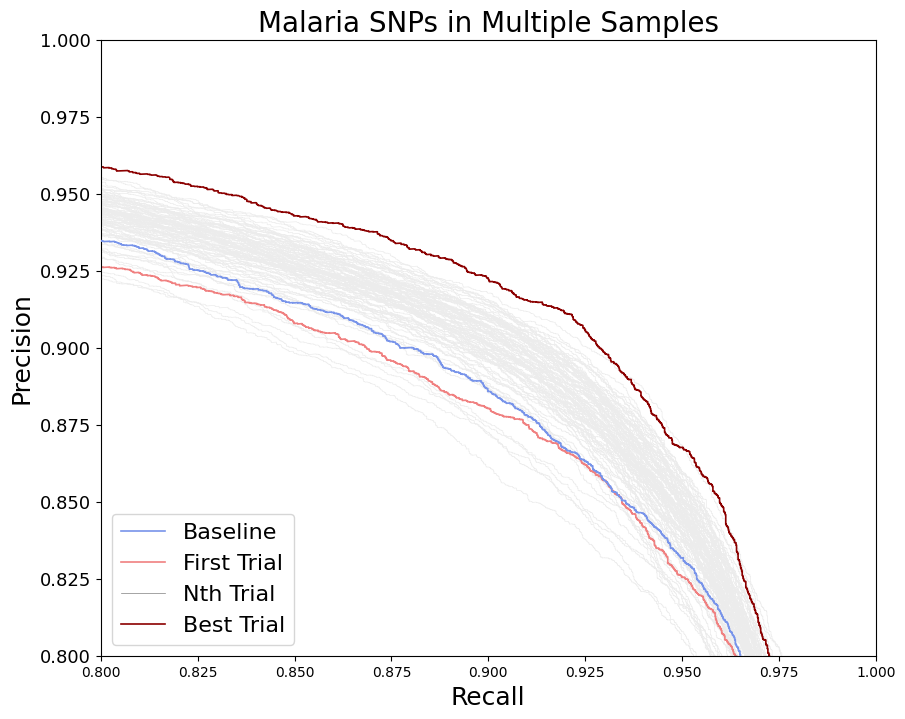

In [76]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize lists to store data
trial_numbers = []
pr_auc_scores = []

# Collect precision and recall for all trials and the baseline
all_trials_data = {}
baseline_data = None
line_width = 1.2

# Loop through each file to collect precision and recall for all trials
for filename in os.listdir(directory):
    if filename.endswith('.pkl') and 'test.score.try' not in filename:  # Add condition to skip unwanted filenames
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            
            if 'baseline' in filename:
                # Special handling for baseline data
                baseline_precision = data['SCORE']['snp']['precision_n']
                baseline_recall = data['SCORE']['snp']['recall_n']
                baseline_pr_auc = auc(baseline_recall, baseline_precision)
                baseline_data = (baseline_precision, baseline_recall, baseline_pr_auc)
            else:
                # Handle trial data
                precision = data['SCORE']['snp']['precision_n']
                recall = data['SCORE']['snp']['recall_n']
                pr_auc = auc(recall, precision)
                
                trial_number = int(filename.rstrip('.pkl').split('_')[-1])
                trial_numbers.append(trial_number)
                pr_auc_scores.append(pr_auc)
                
                # Store the precision and recall data for this trial
                all_trials_data[trial_number] = (precision, recall)

# Identify the first trial and best trial
first_trial_number = min(trial_numbers)
first_trial_data = all_trials_data[first_trial_number]

best_trial_index = pr_auc_scores.index(max(pr_auc_scores))
best_trial_number = trial_numbers[best_trial_index]
best_trial_data = all_trials_data[best_trial_number]

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the baseline first to ensure it appears first in the legend
if baseline_data:
    plt.plot(baseline_data[1], baseline_data[0], color='#7894EA', label='Baseline', linewidth=line_width, zorder=3)

# Add a grey line for the legend entry (other trials)

# Plot all trials in grey with a higher zorder to make them visible over the blue line
for trial_number, (precision, recall) in all_trials_data.items():
    color = '#ececec'  # Light grey color for other trials
    if trial_number not in [first_trial_number, best_trial_number]:
        plt.plot(recall, precision, color=color, zorder=1, linewidth=0.5)

# Highlight the first trial with the second highest zorder
plt.plot(first_trial_data[1], first_trial_data[0], color='lightcoral', label='First Trial', zorder=2, linewidth=line_width)
plt.plot([], [], color='grey', linewidth=0.5, label='Nth Trial')
# Highlight the best trial with the second highest zorder
plt.plot(best_trial_data[1], best_trial_data[0], color='darkred', label='Best Trial', zorder=2, linewidth=line_width)

# Set plot limits
plt.xlim([0.8, 1])
plt.ylim([0.8, 1])
# Set font size for tick labels
plt.yticks(fontsize=13)

# Set plot labels and title with increased font size
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Malaria SNPs in Multiple Samples', fontsize=20)

# Create custom handles and labels for the legend to control order
handles, labels = plt.gca().get_legend_handles_labels()
# Order: Baseline, Other Trials, First Trial, Best Trial
order = [0, 1, 2, 3]
# Apply custom order
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='lower left', fontsize=16)

plt.grid(False)
plt.show()


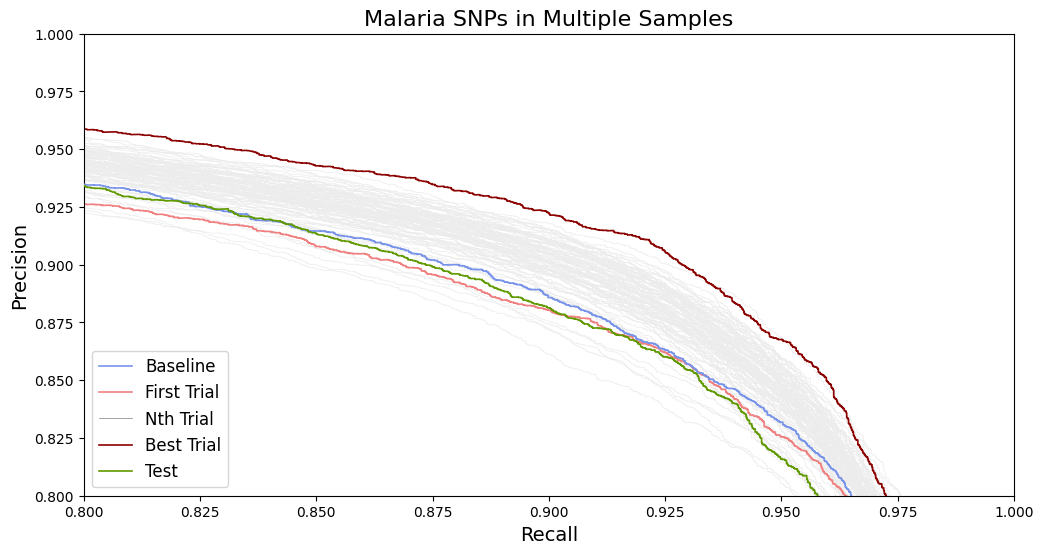

In [67]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Directory where your .pkl files are stored
directory = 'pkls'

# Initialize lists to store data
trial_numbers = []
pr_auc_scores = []

# Collect precision and recall for all trials, the baseline, and the test file
all_trials_data = {}
baseline_data = None
test_data = None
line_width = 1.2

# Loop through each file to collect precision and recall
# Loop through each file to collect precision and recall
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):  # Add this line to check if the item is a file
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            
            if 'baseline' in filename:
                # Handle baseline data
                baseline_precision = data['SCORE']['snp']['precision_n']
                baseline_recall = data['SCORE']['snp']['recall_n']
                baseline_pr_auc = auc(baseline_recall, baseline_precision)
                baseline_data = (baseline_precision, baseline_recall, baseline_pr_auc)
            elif 'test.score.try' in filename:
                # Handle test file data
                test_precision = data['SCORE']['snp']['precision_n']
                test_recall = data['SCORE']['snp']['recall_n']
                test_pr_auc = auc(test_recall, test_precision)
                test_data = (test_precision, test_recall, test_pr_auc)
            else:
                # Handle trial data
                precision = data['SCORE']['snp']['precision_n']
                recall = data['SCORE']['snp']['recall_n']
                pr_auc = auc(recall, precision)
                
                trial_number = int(filename.rstrip('.pkl').split('_')[-1])
                trial_numbers.append(trial_number)
                pr_auc_scores.append(pr_auc)
                
                # Store the precision and recall data for this trial
                all_trials_data[trial_number] = (precision, recall)


# Identify the first trial and best trial
first_trial_number = min(trial_numbers)
first_trial_data = all_trials_data[first_trial_number]

best_trial_index = pr_auc_scores.index(max(pr_auc_scores))
best_trial_number = trial_numbers[best_trial_index]
best_trial_data = all_trials_data[best_trial_number]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the baseline first
if baseline_data:
    plt.plot(baseline_data[1], baseline_data[0], color='#7894EA', label='Baseline', linewidth=line_width, zorder=3)

# Plot the test data
if test_data:
    plt.plot(test_data[1], test_data[0], color='#619900', label='Test', linewidth=line_width, zorder=4)

# Plot all other trials in grey
for trial_number, (precision, recall) in all_trials_data.items():
    if trial_number not in [first_trial_number, best_trial_number]:
        plt.plot(recall, precision, color='#ececec', zorder=1, linewidth=0.5)

# Highlight the first and best trials
plt.plot(first_trial_data[1], first_trial_data[0], color='lightcoral', label='First Trial', zorder=2, linewidth=line_width)
plt.plot(best_trial_data[1], best_trial_data[0], color='darkred', label='Best Trial', zorder=2, linewidth=line_width)
plt.plot([], [], color='grey', linewidth=0.5, label='Nth Trial')

# Set plot limits and labels
plt.xlim([0.8, 1])
plt.ylim([0.8, 1])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Malaria SNPs in Multiple Samples', fontsize=16)

# Create custom legend order
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 4, 3, 1]  # Baseline, First Trial, Best Trial, Test, Other Trials
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='lower left', fontsize=12)

plt.grid(False)
plt.show()
